In [1]:
import polars as pl
import polars.selectors as cs

import altair as alt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List5

In [2]:
atp_matches_path = r"D:\Downloads\archive (2)\tennis_atp\atp_matches\*"

In [3]:
df = pl.read_csv(atp_matches_path)

In [4]:
total_wins_atp = df.select(
    pl.col('winner_name')
).group_by(
    pl.col('winner_name')
).len().sort(by='len', descending=True)

total_wins_atp

winner_name,len
str,u32
"""Jimmy Connors""",1279
"""Roger Federer""",1265
"""Novak Djokovic""",1115
"""Rafael Nadal""",1086
"""Ivan Lendl""",1075
…,…
"""Terry Hassall""",1
"""Scott Willinsky""",1
"""Stefano Tarallo""",1


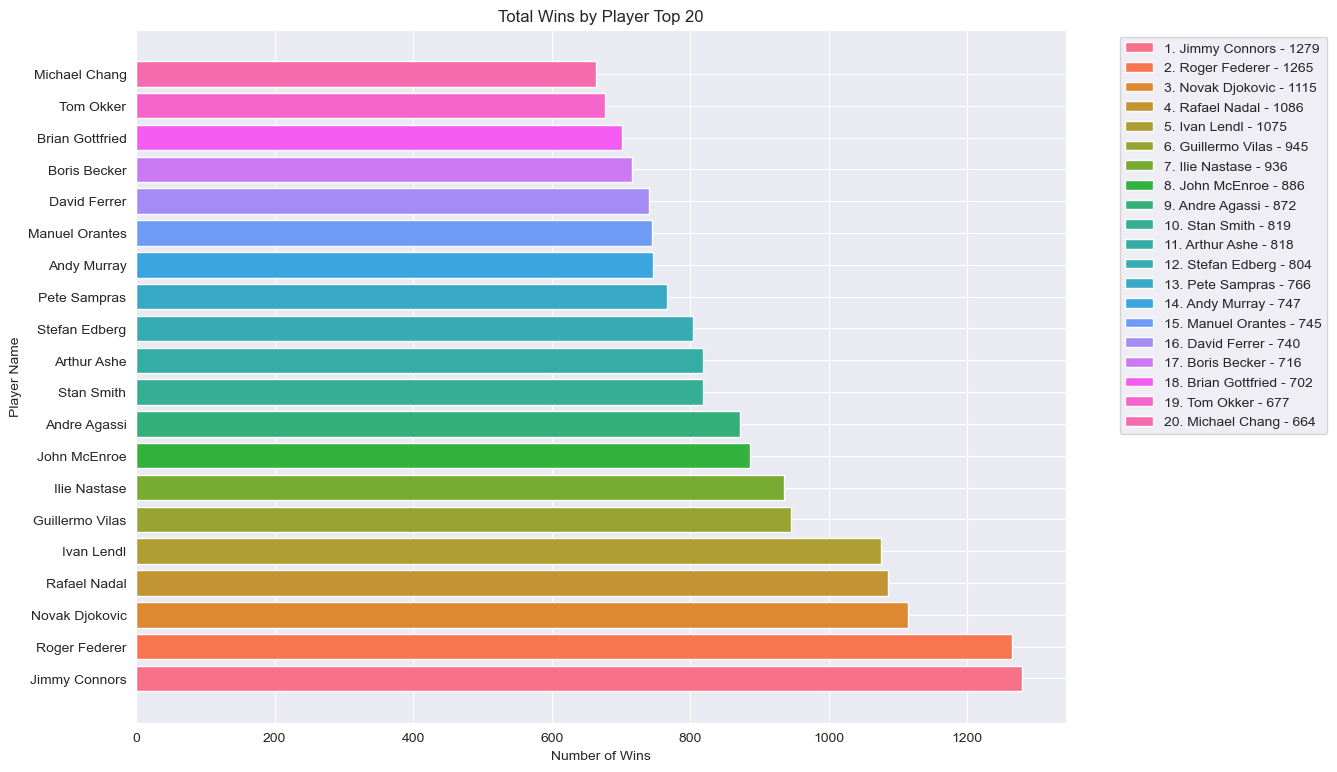

In [5]:
total_wins_atp_pandas = total_wins_atp.to_pandas().head(20)

plt.figure(figsize=(12, 9))

palette = sns.color_palette(
    'husl',
    len(total_wins_atp_pandas)
)
color_sequence = palette.as_hex()

bars = plt.barh(
    total_wins_atp_pandas['winner_name'],
    total_wins_atp_pandas['len'],
    color=color_sequence,
)

legend_labels = [f"{i+1}. {row['winner_name']} - {row['len']}" for i, row in total_wins_atp_pandas.iterrows()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Total Wins by Player Top 20')
plt.xlabel('Number of Wins')
plt.ylabel('Player Name')

plt.show()

In [6]:
df.select(
    pl.col('winner_rank')
).unique()

winner_rank
str
"""524"""
"""1498"""
"""653"""
"""1783"""
"""359"""
…
"""1256"""
"""1062"""
"""693"""


In [7]:
total_wins_r128 = df.filter(
    pl.col('round') == "R128"
).select(
    pl.col('winner_name')
).group_by(
    pl.col('winner_name')
).len().sort(
    by='len', descending=True
)
total_wins_r128

winner_name,len
str,u32
"""Roger Federer""",76
"""Novak Djokovic""",72
"""Rafael Nadal""",68
"""Fernando Verdasco""",61
"""Stan Wawrinka""",61
…,…
"""Mark Vines""",1
"""Detler Herdy""",1
"""German Lopez""",1


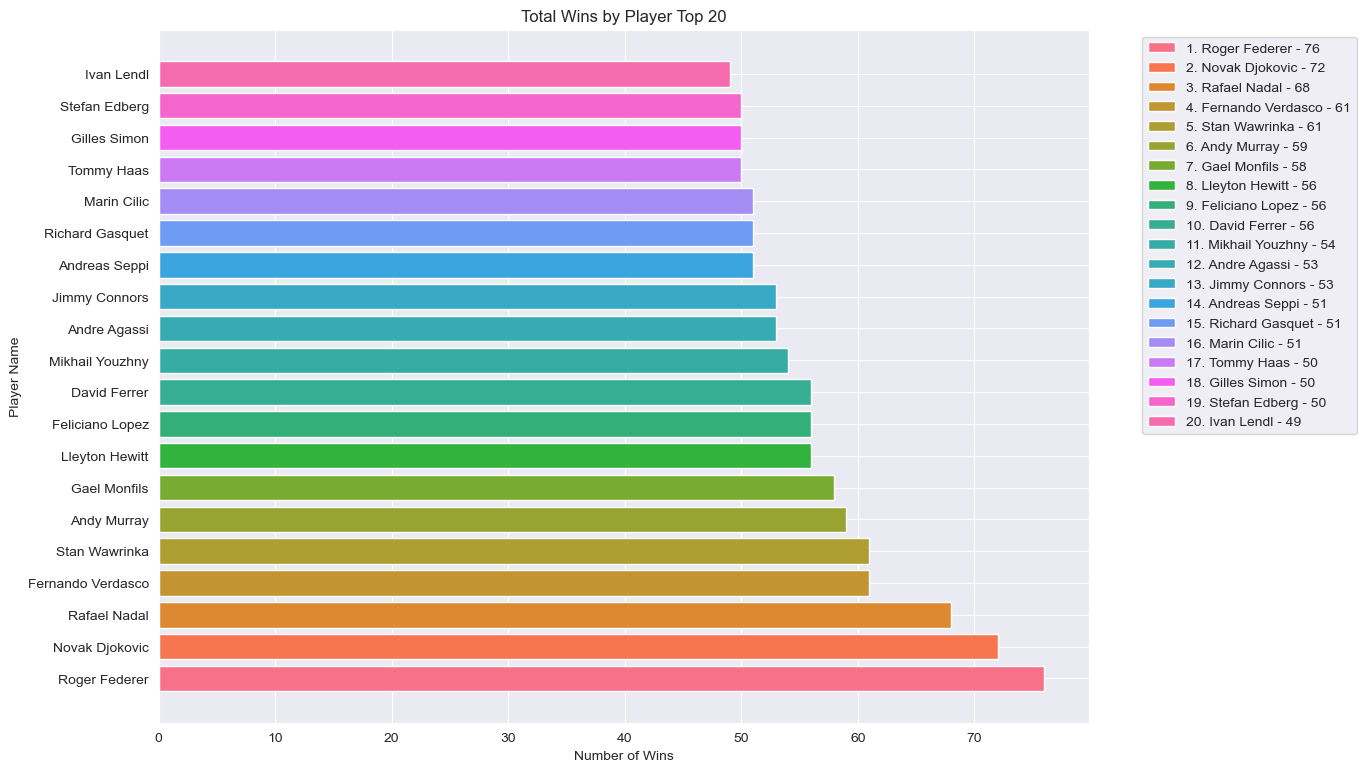

In [8]:
total_wins_r128_pandas = total_wins_r128.to_pandas().head(20)

plt.figure(figsize=(12, 9))

palette = sns.color_palette(
    'husl',
    len(total_wins_r128_pandas)
)
color_sequence = palette.as_hex()

bars = plt.barh(
    total_wins_r128_pandas['winner_name'],
    total_wins_r128_pandas['len'],
    color=color_sequence,
)

legend_labels = [f"{i+1}. {row['winner_name']} - {row['len']}" for i, row in total_wins_r128_pandas.iterrows()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Total Wins by Player Top 20')
plt.xlabel('Number of Wins')
plt.ylabel('Player Name')

plt.show()

In [9]:
total_wins_r64 = df.filter(
    pl.col('round') == "R64"
).select(
    pl.col('winner_name')
).group_by(
    pl.col('winner_name')
).len().sort(
    by='len', descending=True
)

total_wins_r64

winner_name,len
str,u32
"""Jimmy Connors""",137
"""Guillermo Vilas""",130
"""Jaime Fillol""",129
"""Roger Federer""",129
"""Feliciano Lopez""",120
…,…
"""Colin Mchugo""",1
"""Dan Birchmore""",1
"""Reijo Tuomola""",1


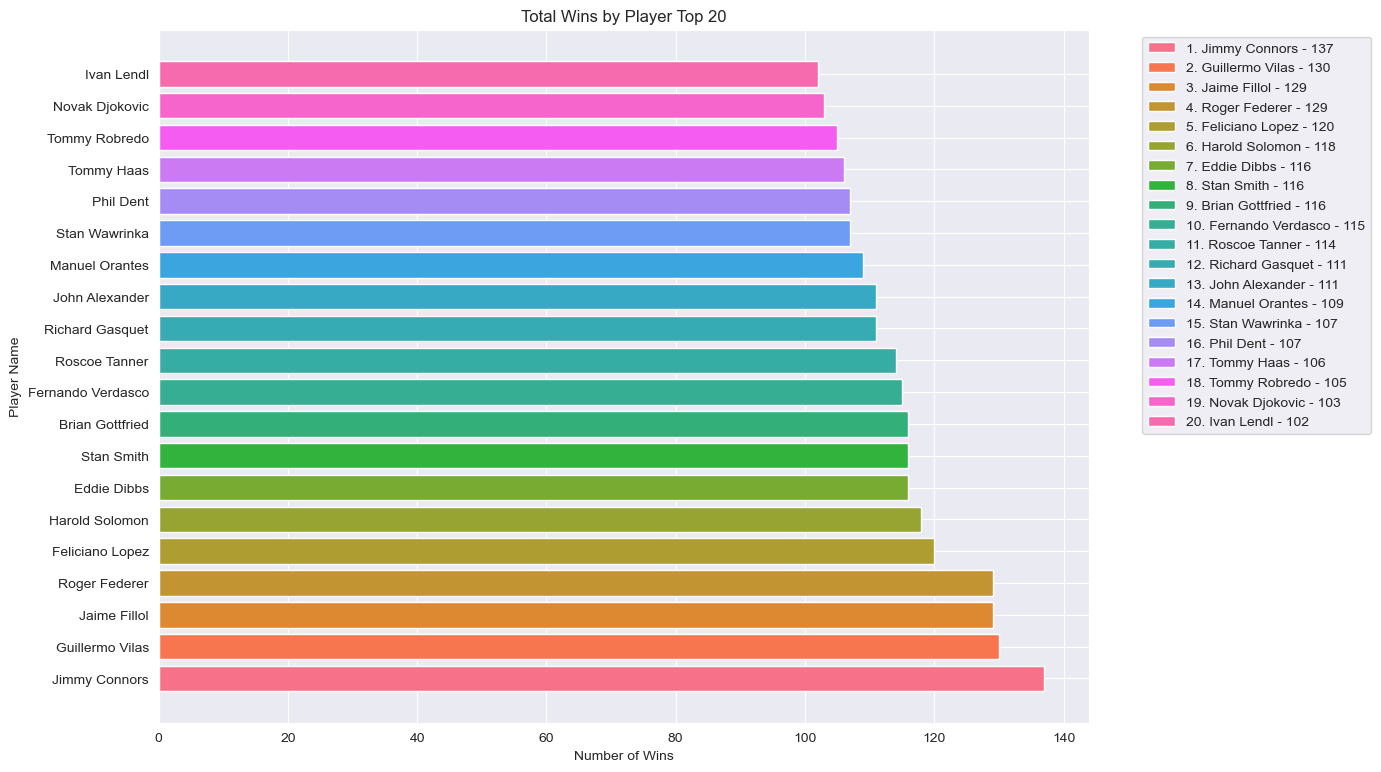

In [10]:
total_wins_r64_pandas = total_wins_r64.to_pandas().head(20)

plt.figure(figsize=(12, 9))

palette = sns.color_palette(
    'husl',
    len(total_wins_r64_pandas)
)
color_sequence = palette.as_hex()

bars = plt.barh(
    total_wins_r64_pandas['winner_name'],
    total_wins_r64_pandas['len'],
    color=color_sequence,
)

legend_labels = [f"{i+1}. {row['winner_name']} - {row['len']}" for i, row in total_wins_r64_pandas.iterrows()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Total Wins by Player Top 20')
plt.xlabel('Number of Wins')
plt.ylabel('Player Name')

plt.show()

In [11]:
total_wins_r32 = df.filter(
    pl.col('round') == "R32"
).select(
    pl.col('winner_name')
).group_by(
    pl.col('winner_name')
).len().sort(
    by='len', descending=True
)

total_wins_r32

winner_name,len
str,u32
"""Jimmy Connors""",276
"""Roger Federer""",271
"""Ivan Lendl""",246
"""Rafael Nadal""",245
"""Novak Djokovic""",228
…,…
"""A Boss""",1
"""Charles Beckman""",1
"""Louis Wessels""",1


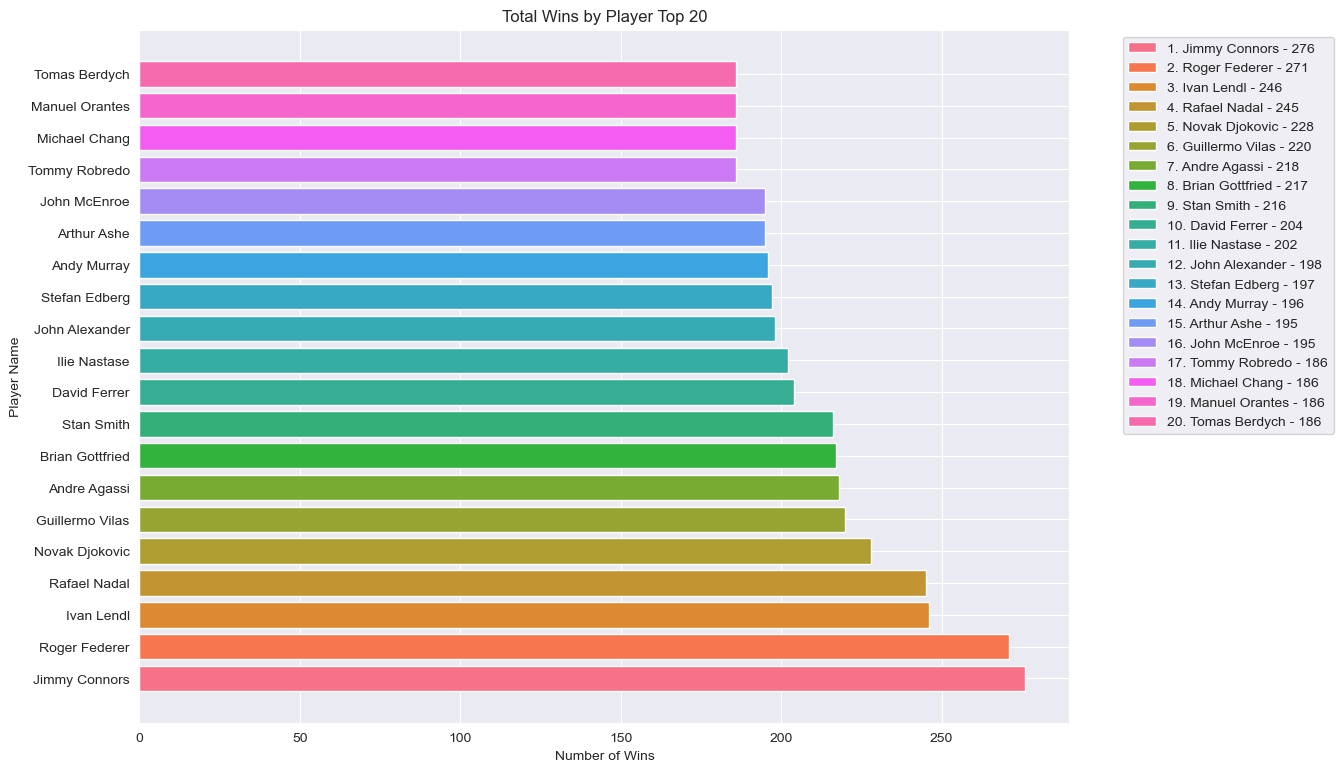

In [12]:
total_wins_r32_pandas = total_wins_r32.to_pandas().head(20)

plt.figure(figsize=(12, 9))

palette = sns.color_palette(
    'husl',
    len(total_wins_r32_pandas)
)
color_sequence = palette.as_hex()

bars = plt.barh(
    total_wins_r32_pandas['winner_name'],
    total_wins_r32_pandas['len'],
    color=color_sequence,
)

legend_labels = [f"{i+1}. {row['winner_name']} - {row['len']}" for i, row in total_wins_r32_pandas.iterrows()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Total Wins by Player Top 20')
plt.xlabel('Number of Wins')
plt.ylabel('Player Name')

plt.show()

In [13]:
total_wins_r16 = df.filter(
    pl.col('round') == "R16"
).select(
    pl.col('winner_name')
).group_by(
    pl.col('winner_name')
).len().sort(
    by='len', descending=True
)

total_wins_r16

winner_name,len
str,u32
"""Jimmy Connors""",263
"""Roger Federer""",245
"""Rafael Nadal""",225
"""Novak Djokovic""",211
"""Ivan Lendl""",206
…,…
"""Dirk Dier""",1
"""Marcio Carlsson""",1
"""Daniel Elsner""",1


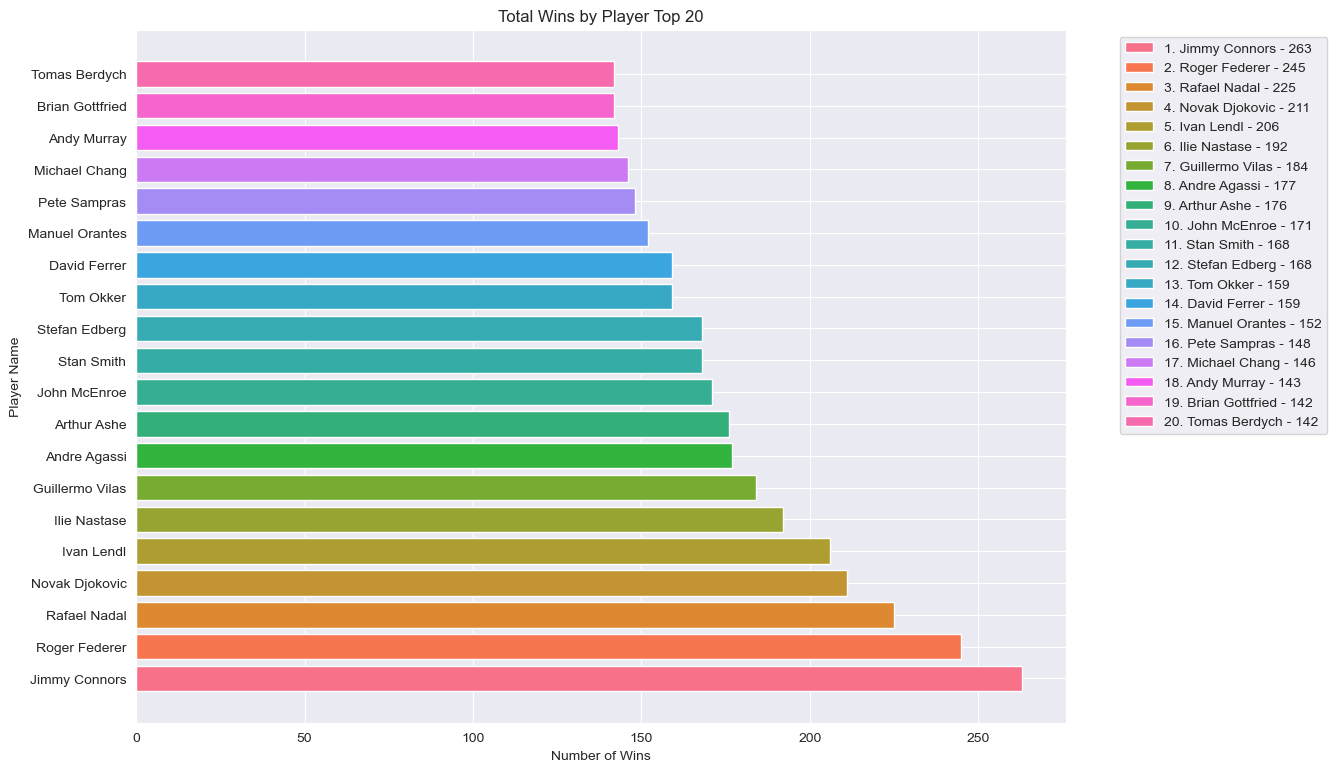

In [14]:
total_wins_r16_pandas = total_wins_r16.to_pandas().head(20)

plt.figure(figsize=(12, 9))

palette = sns.color_palette(
    'husl',
    len(total_wins_r16_pandas)
)
color_sequence = palette.as_hex()

bars = plt.barh(
    total_wins_r16_pandas['winner_name'],
    total_wins_r16_pandas['len'],
    color=color_sequence,
)

legend_labels = [f"{i+1}. {row['winner_name']} - {row['len']}" for i, row in total_wins_r16_pandas.iterrows()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Total Wins by Player Top 20')
plt.xlabel('Number of Wins')
plt.ylabel('Player Name')

plt.show()

In [15]:
total_wins_SF = df.filter(
    pl.col('round') == "SF"
).select(
    pl.col('winner_name')
).group_by(
    pl.col('winner_name')
).len().sort(
    by='len', descending=True
)

total_wins_SF

winner_name,len
str,u32
"""Jimmy Connors""",163
"""Roger Federer""",157
"""Ivan Lendl""",147
"""Novak Djokovic""",139
"""Rafael Nadal""",131
…,…
"""Juan Manuel Cerundolo""",1
"""Arthur Rinderknech""",1
"""Bud Schultz""",1


In [16]:
total_wins_F = df.filter(
    pl.col('round') == "F"
).select(
    pl.col('winner_name')
).group_by(
    pl.col('winner_name')
).len().sort(
    by='len', descending=True
)

total_wins_F

winner_name,len
str,u32
"""Jimmy Connors""",110
"""Roger Federer""",103
"""Novak Djokovic""",99
"""Ivan Lendl""",95
"""Rafael Nadal""",92
…,…
"""Wilhelm Bungert""",1
"""Yuichi Sugita""",1
"""Taro Daniel""",1


In [17]:
df.select(
    pl.col('tourney_level')
).unique()

tourney_level
str
"""F"""
"""A"""
"""M"""
"""D"""
"""G"""


In [18]:
df.select(
    pl.col('winner_name'),
    pl.col('tourney_level'),
    pl.col('round'),
    pl.col('loser_name'),
    pl.col('score')
).filter(
    pl.col('tourney_level') == 'G',
    pl.col('round') == 'F'
).group_by(
    pl.col('winner_name', 'loser_name')
).len().filter(
    pl.col('winner_name') == "Novak Djokovic",
    pl.col('loser_name') == "Roger Federer"
)

winner_name,loser_name,len
str,str,u32
"""Novak Djokovic""","""Roger Federer""",4


In [19]:
federer_vs_djokovic = df.select(
    pl.col('winner_name'),
    pl.col('tourney_level'),
    pl.col('round'),
    pl.col('loser_name'),
    pl.col('score')
).filter(
    pl.col('tourney_level') == 'G',
    pl.col('round') == 'F'
).group_by(
    pl.col('winner_name', 'loser_name')
).len().filter(
    pl.col('winner_name') == "Roger Federer",
    pl.col('loser_name') == "Novak Djokovic"
)
federer_vs_djokovic

winner_name,loser_name,len
str,str,u32
"""Roger Federer""","""Novak Djokovic""",1


In [20]:
nadal_vs_djokovic = df.select(
    pl.col('winner_name'),
    pl.col('tourney_level'),
    pl.col('round'),
    pl.col('loser_name'),
    pl.col('score')
).filter(
    pl.col('tourney_level') == 'G',
    pl.col('round') == 'F'
).group_by(
    pl.col('winner_name', 'loser_name')
).len().filter(
    pl.col('winner_name') == "Rafael Nadal",
    pl.col('loser_name') == "Novak Djokovic"
)

nadal_vs_djokovic

winner_name,loser_name,len
str,str,u32
"""Rafael Nadal""","""Novak Djokovic""",5


In [21]:
djokovic_vs_nadal = df.select(
    pl.col('winner_name'),
    pl.col('tourney_level'),
    pl.col('round'),
    pl.col('loser_name'),
    pl.col('score')
).filter(
    pl.col('tourney_level') == 'G',
    pl.col('round') == 'F'
).group_by(
    pl.col('winner_name', 'loser_name')
).len().filter(
    pl.col('winner_name') == "Novak Djokovic",
    pl.col('loser_name') == "Rafael Nadal",
)

djokovic_vs_nadal

winner_name,loser_name,len
str,str,u32
"""Novak Djokovic""","""Rafael Nadal""",4


In [22]:
djokovic_vs_nadal = df.select(
    pl.col('winner_name'),
    pl.col('tourney_level'),
    pl.col('round'),
    pl.col('loser_name'),
    pl.col('score')
).filter(
    pl.col('tourney_level') == 'G',
    pl.col('round') == 'F'
).group_by(
    pl.col('winner_name', 'loser_name')
).len().filter(
    pl.col('winner_name') == "Novak Djokovic",
    pl.col('loser_name') == "Rafael Nadal",
)

djokovic_vs_nadal

winner_name,loser_name,len
str,str,u32
"""Novak Djokovic""","""Rafael Nadal""",4


In [23]:
df.select(
    pl.col('winner_name'),
    pl.col('tourney_level'),
    pl.col('round'),
    pl.col('loser_name'),
    pl.col('score')
).filter(
    pl.col('tourney_level') == 'G',
    pl.col('round') == 'F'
).group_by(
    pl.col('winner_name')
).len().sort(
    by='len', descending=True
)

winner_name,len
str,u32
"""Novak Djokovic""",24
"""Rafael Nadal""",22
"""Roger Federer""",20
"""Pete Sampras""",14
"""Bjorn Borg""",11
…,…
"""Vitas Gerulaitis""",1
"""Thomas Johansson""",1
"""Jannik Sinner""",1


In [24]:
df

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
str,str,str,i64,str,i64,i64,i64,str,str,str,str,i64,str,f64,i64,str,str,str,str,i64,str,f64,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,270,112411,null,null,"""Doug Smith""","""U""",null,"""AUS""",null,110196,null,null,"""Peter Ledbetter""","""U""",null,"""IRL""",24.0,"""6-1 7-5""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,271,126914,null,null,"""Louis Pretorius""","""R""",null,"""RSA""",null,209536,null,null,"""Maurice Pollock""","""U""",null,"""IRL""",null,"""6-1 6-1""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,272,209523,null,null,"""Cecil Pedlow""","""U""",null,"""IRL""",null,209535,null,null,"""John Mulvey""","""U""",null,"""IRL""",null,"""6-2 6-2""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,273,100084,null,null,"""Tom Okker""","""R""",178,"""NED""",24.3,209534,null,null,"""Unknown Fearmon""","""U""",null,null,null,"""6-1 6-1""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,274,100132,null,null,"""Armistead Neely""","""R""",null,"""USA""",21.3,209533,null,null,"""Harry Sheridan""","""U""",null,"""IRL""",null,"""6-2 6-4""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2024-M-DC-2024-WG2-PO-URU-MDA-…","""Davis Cup WG2 PO: URU vs MDA""","""Clay""",4,"""D""",20240203,5,212051,null,null,"""Joaquin Aguilar Cardozo ""","""U""",null,"""URU""",18.8,209943,null,null,"""Ilya Snitari""","""U""",null,"""MDA""",21.8,"""6-1 6-0""",3,"""RR""","""77""","""0""","""0""","""36""","""22""","""15""","""10""","""7""","""1""","""1""","""1""","""1""","""61""","""30""","""17""","""7""","""6""","""8""","""14""","""1109""","""8""","""740""","""34"""
"""2024-M-DC-2024-WG2-PO-VIE-RSA-…","""Davis Cup WG2 PO: VIE vs RSA""","""Hard""",4,"""D""",20240202,1,122533,null,null,"""Nam Hoang Ly""","""R""",null,"""VIE""",26.9,202475,null,null,"""Philip Henning""","""R""",null,"""RSA""",23.2,"""6-3 6-4""",3,"""RR""","""131""","""1""","""1""","""86""","""60""","""40""","""13""","""10""","""8""","""9""","""2""","""1""","""56""","""41""","""25""","""6""","""9""","""1""","""4""","""554""","""67""","""748""","""32"""
"""2024-M-DC-2024-WG2-PO-VIE-RSA-…","""Davis Cup WG2 PO: VIE vs RSA""","""Hard""",4,"""D""",20240202,2,144748,null,null,"""Kris Van Wyk""","""U""",null,"""RSA""",27.3,144775,null,null,"""Linh Giang Trinh""","""R""",183,"""VIE""",26.4,"""4-6 6-3 4-0""",3,"""RR""","""131""","""4""","""2""","""76""","""46""","""32""","""10""","""12""","""6""","""11""","""0""","""2""","""71""","""51""","""25""","""7""","""11""","""5""","""12""","""416""","""109""",null,null


In [25]:
player_stats = (
    df.select([
        pl.col('winner_name'),
        pl.col('loser_name')
    ])
    .unpivot(value_name='player')
    .group_by('player')
    .agg([
        pl.len().alias('total_matches'),
        pl.col('variable').filter(pl.col('variable') == 'winner_name').len().alias('wins')
    ])
    .with_columns([
        (pl.col('total_matches') - pl.col('wins')).alias('losses'),
        (pl.col('wins') / pl.col('total_matches') * 100).round(2).alias('win_percentage')
    ])
    .sort('total_matches', descending=True)
).filter(
    pl.col('total_matches') > 50
).sort('win_percentage', descending=True)

player_stats.head(10)

player,total_matches,wins,losses,win_percentage
str,u32,u32,u32,f64
"""Novak Djokovic""",1335,1115,220,83.52
"""Rafael Nadal""",1317,1086,231,82.46
"""Roger Federer""",1545,1265,280,81.88
"""Bjorn Borg""",800,654,146,81.75
"""Ivan Lendl""",1317,1075,242,81.62
"""John McEnroe""",1087,886,201,81.51
"""Jimmy Connors""",1581,1279,302,80.9
"""Rod Laver""",727,580,147,79.78
"""Carlos Alcaraz""",221,173,48,78.28


In [26]:
players = ['Novak Djokovic', 'Rafael Nadal', 'Roger Federer']

def get_head_to_head(winner_name, loser_name, tournament_level=None, round_filter=None):
    query = df.select(
        pl.col('winner_name'),
        pl.col('loser_name'),
        pl.col('tourney_level'),
        pl.col('round'),
        pl.col('score'),
        pl.col('tourney_date'),
        pl.col('tourney_name')
    ).filter(
        pl.col('winner_name') == winner_name,
        pl.col('loser_name') == loser_name
    )

    if tournament_level:
        query = query.filter(
            pl.col('tourney_level') == tournament_level
        )
    if round_filter:
        query = query.filter(
            pl.col('round') == round_filter
        )

    return query

In [27]:
from itertools import permutations

combinations = list(permutations(players, 2))

print('All player combinations')
for combo in combinations:
    print(f"{combo[0]} vs {combo[1]}")

All player combinations
Novak Djokovic vs Rafael Nadal
Novak Djokovic vs Roger Federer
Rafael Nadal vs Novak Djokovic
Rafael Nadal vs Roger Federer
Roger Federer vs Novak Djokovic
Roger Federer vs Rafael Nadal


In [28]:
tournament_level = {
    'G': 'Grand Slam', # The 4 biggest tournaments; highest prestige and points.
    'F': 'Tour Finals', # Season-ending championship for the top 8 players.
    'M': 'Masters 1000', # Nine mandatory, high-level ATP tournaments.
    'A': 'ATP Tour', # Regular season events (ATP 500 & 250 series).
    'D': 'Davis Cup', # Premier international team competition (country vs. country).
}

grand_slam_results = []

for winner, loser in combinations:
    matches = get_head_to_head(winner, loser, tournament_level='G', round_filter='F')
    count = matches.shape[0]

    grand_slam_results.append({
        'Winner': winner,
        'Loser': loser,
        'Grand Slam Final Wins': count
    })

    print(f"{winner} defeats {loser} in {tournament_level['G']} Finals: {count} times")

    if count > 0:
        details = matches.select(['tourney_name', 'tourney_date', 'score']).to_pandas()
        for _, match, in details.iterrows():
            print(f"  - {match['tourney_name']} ({match['tourney_date']}): {match['score']}")
        print()

Novak Djokovic defeats Rafael Nadal in Grand Slam Finals: 4 times
  - Wimbledon (20110620): 6-4 6-1 1-6 6-3
  - US Open (20110829): 6-2 6-4 6-7(3) 6-1
  - Australian Open (20120116): 5-7 6-4 6-2 6-7(5) 7-5
  - Australian Open (20190114): 6-3 6-2 6-3

Novak Djokovic defeats Roger Federer in Grand Slam Finals: 4 times
  - Wimbledon (20140623): 6-7(7) 6-4 7-6(4) 5-7 6-4
  - Wimbledon (20150629): 7-6(1) 6-7(10) 6-4 6-3
  - US Open (20150831): 6-4 5-7 6-4 6-4
  - Wimbledon (20190701): 7-6(5) 1-6 7-6(4) 4-6 13-12(3)

Rafael Nadal defeats Novak Djokovic in Grand Slam Finals: 5 times
  - US Open (20100830): 6-4 5-7 6-4 6-2
  - Roland Garros (20120527): 6-4 6-3 2-6 7-5
  - US Open (20130826): 6-2 3-6 6-4 6-1
  - Roland Garros (20140526): 3-6 7-5 6-2 6-4
  - Roland Garros (20200928): 6-0 6-2 7-5

Rafael Nadal defeats Roger Federer in Grand Slam Finals: 6 times
  - Roland Garros (20060529): 1-6 6-1 6-4 7-6(4)
  - Roland Garros (20070528): 6-3 4-6 6-3 6-4
  - Roland Garros (20080525): 6-1 6-3 6-0


In [29]:
def get_finals_winner(winer_name, loser_name, round_filter):
    query = df.select(
        pl.col('winner_name'),
        pl.col('loser_name'),
        pl.col('round'),
        pl.col('score'),
        pl.col('tourney_date'),
        pl.col('tourney_name')
    ).filter(
        pl.col('winner_name') == winer_name,
        pl.col('loser_name') == loser_name,
    )

    if round_filter:
        query = query.filter(
            pl.col('round') == round_filter
        )

    return query

In [30]:
all_finals_results = []

for winner, loser in combinations:
    matches = get_finals_winner(
        winner, loser, round_filter='F'
    )
    count = matches.shape[0]
    all_finals_results.append({
        'Winner': winner,
        'Loser': loser,
        'All Finals Wins': count
    })

    print(f"{winner} defeats {loser}: Finals: {count} times")

Novak Djokovic defeats Rafael Nadal: Finals: 16 times
Novak Djokovic defeats Roger Federer: Finals: 14 times
Rafael Nadal defeats Novak Djokovic: Finals: 13 times
Rafael Nadal defeats Roger Federer: Finals: 14 times
Roger Federer defeats Novak Djokovic: Finals: 6 times
Roger Federer defeats Rafael Nadal: Finals: 10 times


In [31]:
finals_df = pl.DataFrame(all_finals_results)

finals_df

Winner,Loser,All Finals Wins
str,str,i64
"""Novak Djokovic""","""Rafael Nadal""",16
"""Novak Djokovic""","""Roger Federer""",14
"""Rafael Nadal""","""Novak Djokovic""",13
"""Rafael Nadal""","""Roger Federer""",14
"""Roger Federer""","""Novak Djokovic""",6
"""Roger Federer""","""Rafael Nadal""",10


In [32]:
def get_total_matches_between_players(player1, player2):
    """Get total matches between two players (both directions)"""
    matches = df.filter(
        ((pl.col('winner_name') == player1) & (pl.col('loser_name') == player2)) |
        ((pl.col('winner_name') == player2) & (pl.col('loser_name') == player1)),
        pl.col('round') == 'F'
    )
    return matches.shape[0]

enhanced_finals_results = []

for winner, loser in combinations:
    matches = get_finals_winner(winner, loser, round_filter='F')
    wins = matches.shape[0]

    total_matches = get_total_matches_between_players(winner, loser)

    win_percentage = (wins / total_matches * 100) if total_matches > 0 else 0

    enhanced_finals_results.append({
        'Winner': winner,
        'Loser': loser,
        'Finals Wins': wins,
        'Total Finals Played': total_matches,
        'Win Percentage': round(win_percentage, 2)
    })

finals_df = pl.DataFrame(enhanced_finals_results)

finals_df = finals_df.sort(['Win Percentage', 'Finals Wins'], descending=True)

print("Enhanced Finals Head-to-Head Records:")
finals_df

Enhanced Finals Head-to-Head Records:


Winner,Loser,Finals Wins,Total Finals Played,Win Percentage
str,str,i64,i64,f64
"""Novak Djokovic""","""Roger Federer""",14,20,70.0
"""Rafael Nadal""","""Roger Federer""",14,24,58.33
"""Novak Djokovic""","""Rafael Nadal""",16,29,55.17
"""Rafael Nadal""","""Novak Djokovic""",13,29,44.83
"""Roger Federer""","""Rafael Nadal""",10,24,41.67
"""Roger Federer""","""Novak Djokovic""",6,20,30.0


In [35]:
df.head()

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
str,str,str,i64,str,i64,i64,i64,str,str,str,str,i64,str,f64,i64,str,str,str,str,i64,str,f64,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,270,112411,null,null,"""Doug Smith""","""U""",null,"""AUS""",null,110196,null,null,"""Peter Ledbetter""","""U""",null,"""IRL""",24.0,"""6-1 7-5""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,271,126914,null,null,"""Louis Pretorius""","""R""",null,"""RSA""",null,209536,null,null,"""Maurice Pollock""","""U""",null,"""IRL""",null,"""6-1 6-1""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,272,209523,null,null,"""Cecil Pedlow""","""U""",null,"""IRL""",null,209535,null,null,"""John Mulvey""","""U""",null,"""IRL""",null,"""6-2 6-2""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,273,100084,null,null,"""Tom Okker""","""R""",178,"""NED""",24.3,209534,null,null,"""Unknown Fearmon""","""U""",null,null,null,"""6-1 6-1""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1968-2029""","""Dublin""","""Grass""",32,"""A""",19680708,274,100132,null,null,"""Armistead Neely""","""R""",null,"""USA""",21.3,209533,null,null,"""Harry Sheridan""","""U""",null,"""IRL""",null,"""6-2 6-4""",3,"""R32""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [36]:
df.describe()

statistic,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
str,str,str,str,f64,str,f64,f64,f64,str,str,str,str,f64,str,f64,f64,str,str,str,str,f64,str,f64,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""193337""","""193337""","""190347""",192502.0,"""193337""",193337.0,193337.0,193337.0,"""71544""","""16943""","""193337""","""193327""",176236.0,"""193329""",192026.0,193337.0,"""36476""","""28727""","""193337""","""193288""",163431.0,"""193265""",188680.0,"""193334""",193337.0,"""193337""","""93682""","""96443""","""96442""","""96442""","""96442""","""96442""","""96442""","""96443""","""96442""","""96442""","""96442""","""96443""","""96442""","""96442""","""96442""","""96442""","""96443""","""96442""","""96442""","""157569""","""110346""","""149182""","""108702"""
"""null_count""","""0""","""0""","""2990""",835.0,"""0""",0.0,0.0,0.0,"""121793""","""176394""","""0""","""10""",17101.0,"""8""",1311.0,0.0,"""156861""","""164610""","""0""","""49""",29906.0,"""72""",4657.0,"""3""",0.0,"""0""","""99655""","""96894""","""96895""","""96895""","""96895""","""96895""","""96895""","""96894""","""96895""","""96895""","""96895""","""96894""","""96895""","""96895""","""96895""","""96895""","""96894""","""96895""","""96895""","""35768""","""82991""","""44155""","""84635"""
"""mean""",null,null,null,53.184497,null,1.9939e7,80.579191,104863.644414,null,null,null,null,184.512636,null,25.675078,106029.47141,null,null,null,null,184.279941,null,25.729239,null,3.435861,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,36.755651,null,159643.361647,112.614086,14758.641896,null,null,null,null,6.673546,null,4.054686,17484.75218,null,null,null,null,6.658337,null,4.201515,null,0.826583,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""1968-2016""","""ATP Rio de Janeiro""","""Carpet""",2.0,"""A""",1.9671228e7,1.0,100001.0,"""1""","""ALT""",""" Cross""","""A""",160.0,"""AHO""",14.3,100001.0,"""1""","""ALT""",""" Arguilo""","""A""",160.0,"""AHO""",14.2,""" 4-3 6-6 """,1.0,"""BR""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""-4""","""0""","""1""","""0""","""1""","""0"""
"""25%""",null,null,null,32.0,null,1.9800609e7,11.0,100428.0,null,null,null,null,180.0,null,22.7,100529.0,null,null,null,null,180.0,null,22.7,null,3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,32.0,null,1.9930726e7,26.0,101736.0,null,null,null,null,185.0,null,25.3,101926.0,null,null,null,null,185.0,null,25.4,null,3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,64.0,null,2.0070709e7,100.0,104026.0,null,null,null,null,188.0,null,28.2,104417.0,null,null,null,null,188.0,null,28.4,null,3.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""2024-M-DC-2024-WG2-PO-VIE-RSA-…","""s Hertogenbosch""","""Hard""",128.0,"""M""",2.024052e7,1701.0,212721.0,"""WC""","""WC""","""Zura Tkemaladze""","""U""",211.0,"""ZIM""",58.7,212722.0,"""WC""","""WC""","""Zura Tkemaladze""","""U""",211.0,"""ZIM""",63.6,"""Walkover""",5.0,"""SF""","""99""","""9""","""9""","""99""","""9

In [37]:
df.collect_schema()

Schema([('tourney_id', String),
        ('tourney_name', String),
        ('surface', String),
        ('draw_size', Int64),
        ('tourney_level', String),
        ('tourney_date', Int64),
        ('match_num', Int64),
        ('winner_id', Int64),
        ('winner_seed', String),
        ('winner_entry', String),
        ('winner_name', String),
        ('winner_hand', String),
        ('winner_ht', Int64),
        ('winner_ioc', String),
        ('winner_age', Float64),
        ('loser_id', Int64),
        ('loser_seed', String),
        ('loser_entry', String),
        ('loser_name', String),
        ('loser_hand', String),
        ('loser_ht', Int64),
        ('loser_ioc', String),
        ('loser_age', Float64),
        ('score', String),
        ('best_of', Int64),
        ('round', String),
        ('minutes', String),
        ('w_ace', String),
        ('w_df', String),
        ('w_svpt', String),
        ('w_1stIn', String),
        ('w_1stWon', String),
        ('w_2ndWon

In [38]:
df.n_unique()

193337

In [39]:
df.null_count()

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,2990,835,0,0,0,0,121793,176394,0,10,17101,8,1311,0,156861,164610,0,49,29906,72,4657,3,0,0,99655,96894,96895,96895,96895,96895,96895,96894,96895,96895,96895,96894,96895,96895,96895,96895,96894,96895,96895,35768,82991,44155,84635


In [40]:
df.estimated_size('mb')

32.610379219055176

In [42]:
df.collect_schema()

Schema([('tourney_id', String),
        ('tourney_name', String),
        ('surface', String),
        ('draw_size', Int64),
        ('tourney_level', String),
        ('tourney_date', Int64),
        ('match_num', Int64),
        ('winner_id', Int64),
        ('winner_seed', String),
        ('winner_entry', String),
        ('winner_name', String),
        ('winner_hand', String),
        ('winner_ht', Int64),
        ('winner_ioc', String),
        ('winner_age', Float64),
        ('loser_id', Int64),
        ('loser_seed', String),
        ('loser_entry', String),
        ('loser_name', String),
        ('loser_hand', String),
        ('loser_ht', Int64),
        ('loser_ioc', String),
        ('loser_age', Float64),
        ('score', String),
        ('best_of', Int64),
        ('round', String),
        ('minutes', String),
        ('w_ace', String),
        ('w_df', String),
        ('w_svpt', String),
        ('w_1stIn', String),
        ('w_1stWon', String),
        ('w_2ndWon

In [66]:
df.with_columns(
    pl.col('draw_size').cast(pl.UInt8),
    pl.from_epoch(pl.col('tourney_date'), time_unit='s'),
    pl.col('match_num').cast(pl.UInt16),
    pl.col('winner_id').cast(pl.UInt32),
    pl.col('winner_ht').cast(pl.UInt16),
    pl.col('winner_age').cast(pl.Float32),
    pl.col('loser_id').cast(pl.UInt32),
    pl.col('loser_ht').cast(pl.UInt16),
    pl.col('loser_age').cast(pl.Float32),
    pl.col('best_of').cast(pl.UInt8),
).estimated_size('mb')

23.76011371612549

In [78]:
df.with_columns(
    pl.from_epoch(pl.col('tourney_date'), time_unit='s'),
).with_columns(
    pl.all().shrink_dtype()
).estimated_size('mb')

23.944494247436523

In [84]:
@pl.api.register_dataframe_namespace('optimize_data')
class OptimizedTypes:

    def __init__(self, df: pl.DataFrame):
        self._df = df

    def downcast_integers(self) -> pl.DataFrame:
        return self._df.with_columns(
            pl.col(pl.Int64).cast(pl.Int32),
        )

In [87]:
df.optimize.downcast_integers().collect_schema()

Schema([('tourney_id', String),
        ('tourney_name', String),
        ('surface', String),
        ('draw_size', Int16),
        ('tourney_level', String),
        ('tourney_date', Datetime(time_unit='us', time_zone=None)),
        ('match_num', Int16),
        ('winner_id', Int32),
        ('winner_seed', String),
        ('winner_entry', String),
        ('winner_name', String),
        ('winner_hand', String),
        ('winner_ht', Int16),
        ('winner_ioc', String),
        ('winner_age', Float32),
        ('loser_id', Int32),
        ('loser_seed', String),
        ('loser_entry', String),
        ('loser_name', String),
        ('loser_hand', String),
        ('loser_ht', Int16),
        ('loser_ioc', String),
        ('loser_age', Float32),
        ('score', String),
        ('best_of', Int8),
        ('round', String),
        ('minutes', String),
        ('w_ace', String),
        ('w_df', String),
        ('w_svpt', String),
        ('w_1stIn', String),
        ('w_1s

In [79]:
df = df.with_columns(
    pl.from_epoch(pl.col('tourney_date'), time_unit='s'),
).with_columns(
    pl.all().shrink_dtype()
)

In [88]:
df.glimpse()

Rows: 193337
Columns: 49
$ tourney_id                  <str> '1968-2029', '1968-2029', '1968-2029', '1968-2029', '1968-2029', '1968-2029', '1968-2029', '1968-2029', '1968-2029', '1968-2029'
$ tourney_name                <str> 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin'
$ surface                     <str> 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass'
$ draw_size                   <i16> 32, 32, 32, 32, 32, 32, 32, 32, 32, 32
$ tourney_level               <str> 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'
$ tourney_date       <datetime[μs]> 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48, 1970-08-16 18:51:48
$ match_num                   <i16> 270, 271, 272, 273, 274, 275, 276, 277, 278, 279
$ winner_id                   <i32> 112411, 126914, 209523, 

In [93]:
# df.select(pl.all().approx_n_unique())

In [110]:
total_wins = df.select(
    pl.col('winner_name'),
).group_by(
    pl.col('winner_name'),
).agg([
    pl.col('winner_name').len().alias('Total_wins'),
]).sort('Total_wins', descending=True)

total_loses = df.select(
    pl.col('loser_name')
).group_by(
    pl.col('loser_name')
).agg([
    pl.count('loser_name').alias('Total_loses'),
]).sort('Total_loses', descending=True)

In [120]:
player_win_loss_stats = total_wins.join(total_loses, left_on='winner_name', right_on='loser_name').with_columns(
    (pl.col('Total_wins') + pl.col('Total_loses')).alias('Total_matches')
).with_columns(
    (pl.col('Total_wins') / pl.col('Total_matches') * 100).round(2).alias('Win_Percentage')
).sort('Win_Percentage', descending=True)

player_win_loss_stats

winner_name,Total_wins,Total_loses,Total_matches,Win_Percentage
str,u32,u32,u32,f64
"""Jean Julien Rojer""",13,1,14,92.86
"""Liang Chi Huang""",6,1,7,85.71
"""Young Dae Jeon""",11,2,13,84.62
"""Novak Djokovic""",1115,220,1335,83.52
"""Sergio Galdos""",5,1,6,83.33
…,…,…,…,…
"""Eric Prodon""",1,19,20,5.0
"""Abou Berthe""",1,19,20,5.0
"""Alkis Papamichael""",1,19,20,5.0


# Data analysis